In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
df= pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [109]:
df.shape

(1338, 7)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [111]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


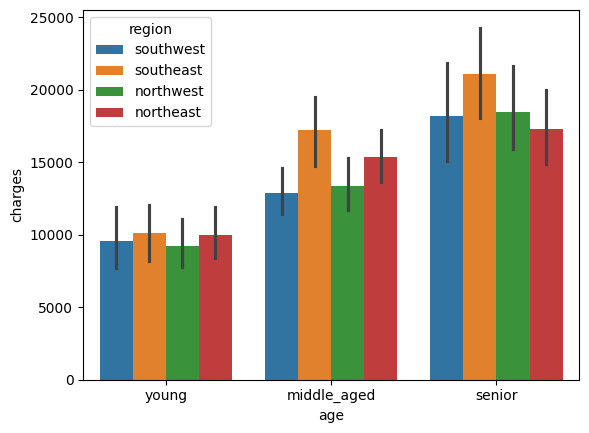

In [112]:
ag = [ 17, 35, 55, 120]
cat = [ 'young', 'middle_aged', 'senior']
a = pd.cut(df['age'], bins=ag, labels=cat)
sns.barplot(x=a, y='charges', hue='region', data=df)
plt.show()

In [113]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

In [114]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


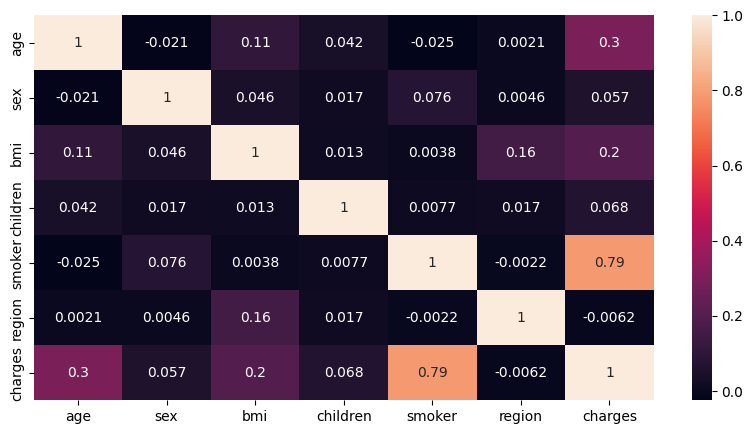

In [115]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True)
plt.show()

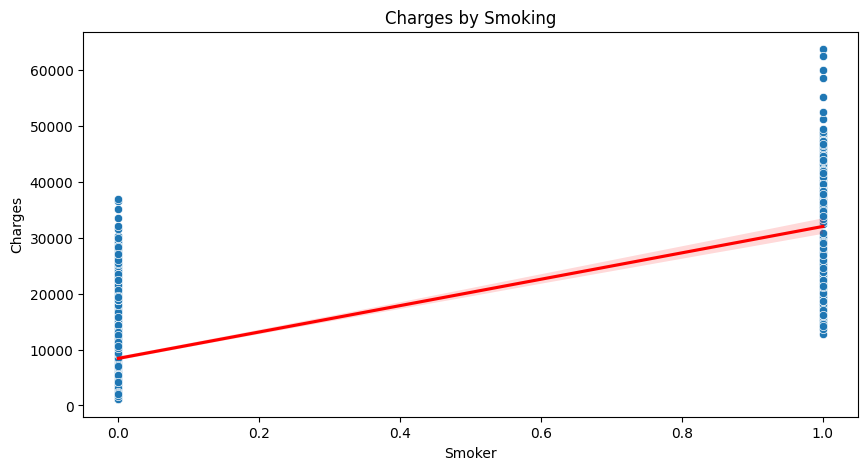

In [116]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='smoker', y='charges', data=df)
sns.regplot(x='smoker', y='charges', data=df, scatter=False, color='red')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Charges by Smoking')
plt.show()

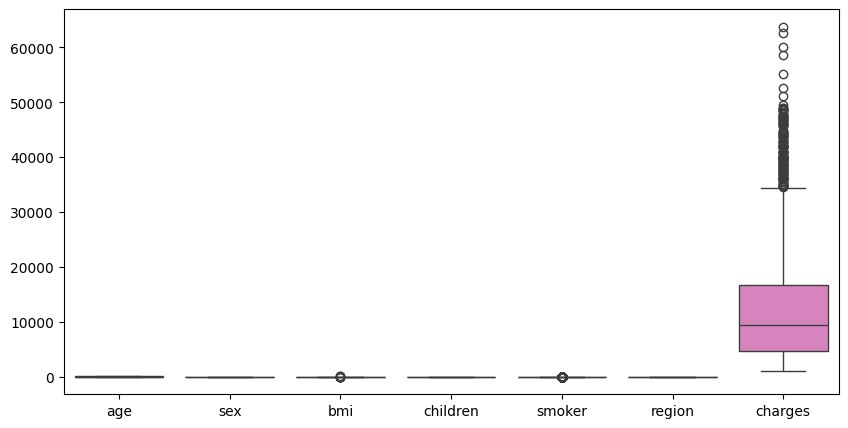

In [117]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df)
plt.show()

<Axes: >

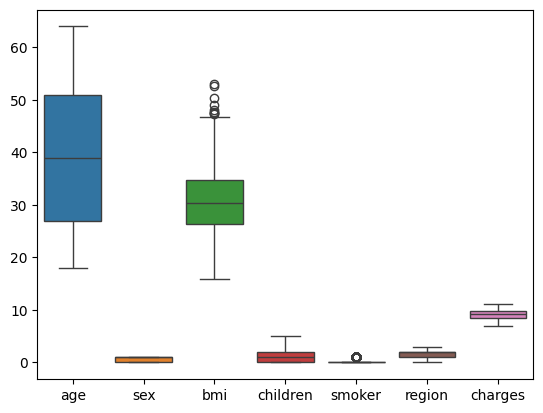

In [118]:
df['charges'] = np.log(df['charges'])
sns.boxplot(data=df)

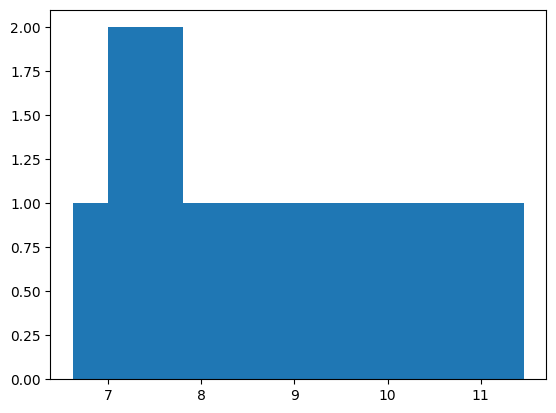

In [119]:
p = df['charges'].value_counts()
plt.bar(p.index,p.values)
plt.show()

In [120]:
from sklearn.model_selection  import train_test_split
x = df.drop(columns=['charges'])
y = df['charges']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in x.columns:
    if x[i].dtype == 'object':
        x[i] = le.fit_transform(x[i])


y = le.fit_transform(y)

In [121]:
from sklearn.model_selection  import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [122]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(include_bias=False)
x_train = poly.fit_transform(x_train)
x_test = poly.fit_transform(x_test)

In [123]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

mm = MinMaxScaler()
x_train = mm.fit_transform(x_train)
x_test = mm.fit_transform(x_test)

In [124]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

ln = LinearRegression()
ln.fit(x_train, y_train)

LinearRegression()

In [125]:
y_pred = ln.predict(x_test)
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

MSE: 23573.731885683876
R2: 0.8507253000733308


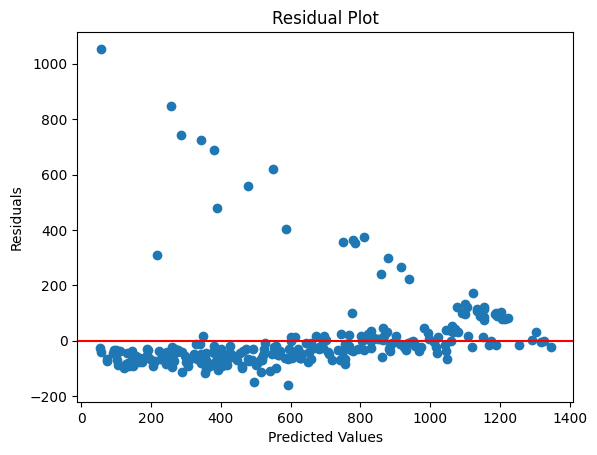

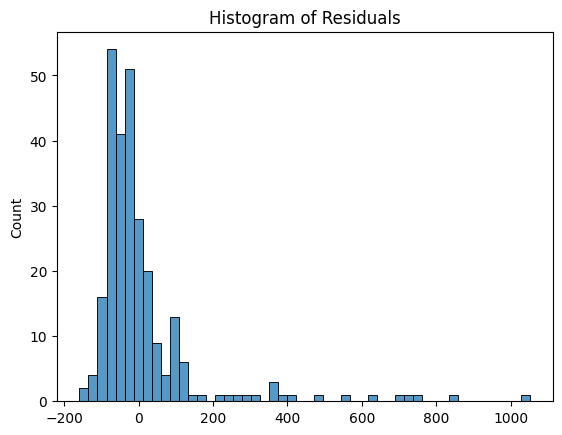

In [126]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

sns.histplot(residuals)
plt.title('Histogram of Residuals')
plt.show()

In [127]:
from sklearn.ensemble import RandomForestRegressor
r = RandomForestRegressor()
r.fit(x_train, y_train)

RandomForestRegressor()

In [128]:
y_pr = r.predict(x_test)
print('MSE:', mean_squared_error(y_test, y_pr))
print('R2:', r2_score(y_test, y_pr))

MSE: 24343.551469194445
R2: 0.8458506120992981


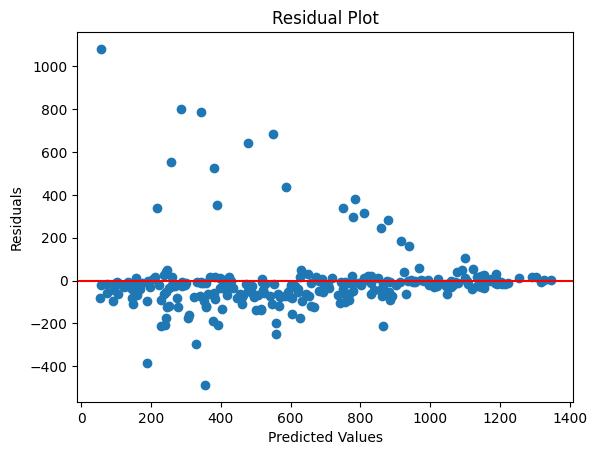

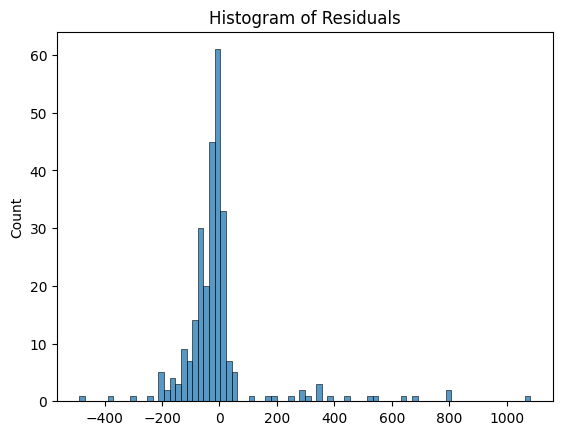

In [129]:
residuals = y_test - y_pr

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

sns.histplot(residuals)
plt.title('Histogram of Residuals')
plt.show()

In [130]:
from sklearn.ensemble import GradientBoostingRegressor
g = GradientBoostingRegressor()
g.fit(x_train, y_train)

GradientBoostingRegressor()

In [131]:
gg = g.predict(x_test)
print('MSE:', mean_squared_error(y_test, gg))
print('R2:', r2_score(y_test, gg))

MSE: 25869.382723628307
R2: 0.8361886712683401


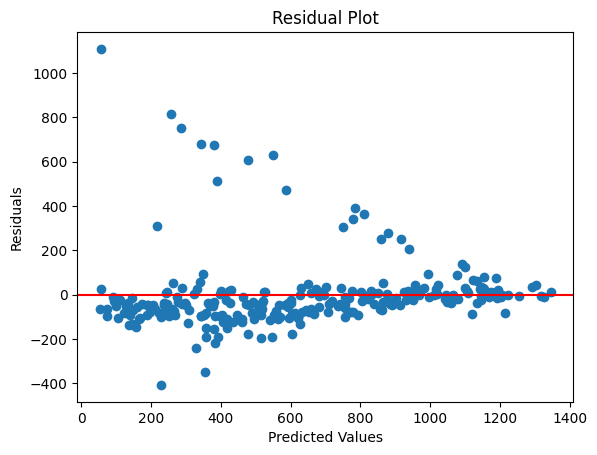

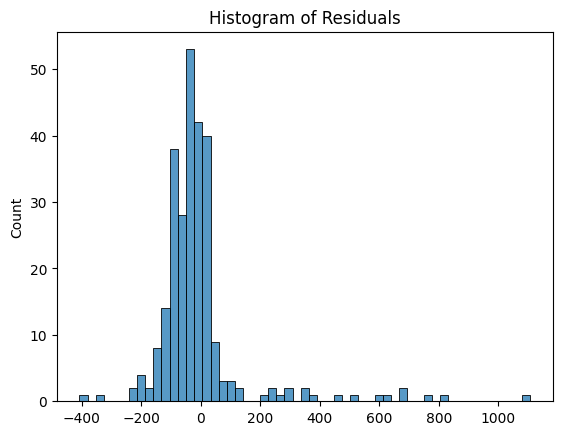

In [106]:
residuals = y_test - gg

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

sns.histplot(residuals)
plt.title('Histogram of Residuals')
plt.show()

In [132]:
import joblib
joblib.dump(ln, 'linear.pkl')
joblib.dump(r, 'random.pkl')
joblib.dump(g, 'gradient.pkl')

['gradient.pkl']